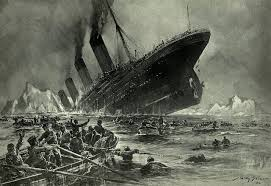

Le naufrage du Titanic est l’un des naufrages les plus infâmes de l’histoire.

La question qui se pose est : « **quels types de personnes ont le plus de chances de survivre ?** »


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Collecte Data**

In [ ]:

!pip install kaggle

# Replace with your Kaggle API key
!mkdir -p ~/.kaggle
!echo '{"username":"YOUR_KAGGLE_USERNAME","key":"YOUR_KAGGLE_API_KEY"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d yasserh/titanic-dataset

!unzip titanic-dataset.zip -d titanic_data

import pandas as pd

# Load the dataset into a pandas DataFrame
Train = pd.read_csv("titanic_data/Titanic-Dataset.csv")

# Display the first few rows of the DataFrame
#print(Train.head())
Train

Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset
License(s): CC0-1.0
titanic-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic-dataset.zip
replace titanic_data/Titanic-Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
#import pandas as pd
#file_path = '/content/drive/MyDrive/MLOPS/Titanic-Dataset.csv'
#Train = pd.read_csv(file_path)

#print(Train.head())
#Train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# **Nettoyage Data**

In [ ]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
Train_1= Train.copy()
Train_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Train_1.isnull().any()

,0
PassengerId,False
Survived,False
Pclass,False
Name,False
Sex,False
Age,True
SibSp,False
Parch,False
Ticket,False
Fare,False


Valeurs manquantes dans Age, Cabin et Embarked

In [ ]:
# Percentage of missing values for variables with missing values
missing_values_percentage = Train_1.isnull().sum() * 100 / len(Train_1)
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]
missing_values_percentage

,0
Age,19.865320
Cabin,77.104377
Embarked,0.224467


Âge : 19,87 % des valeurs sont manquantes

Embarqué : 0,22 % des valeurs sont manquantes

Cabine : 77.10 % des valeurs sont manquantes, fortement incomplete

# **Clean Data**

     PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
0          False     False   False  False  False  False  False
1          False     False   False  False  False  False   True
2          False     False   False  False  False  False  False
3          False     False   False  False  False  False  False
4          False     False   False  False  False  False  False
..           ...       ...     ...    ...    ...    ...    ...
886        False     False   False  False  False  False  False
887        False     False   False  False  False  False  False
888        False     False   False  False  False   True  False
889        False     False   False  False  False  False  False
890        False     False   False  False  False  False  False

[891 rows x 7 columns]


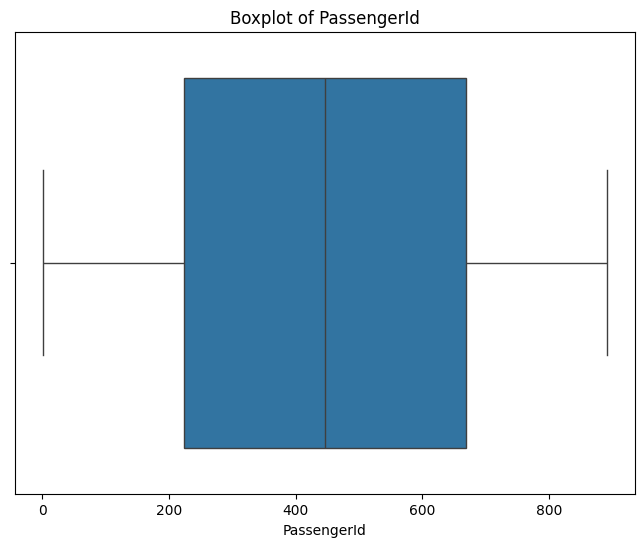

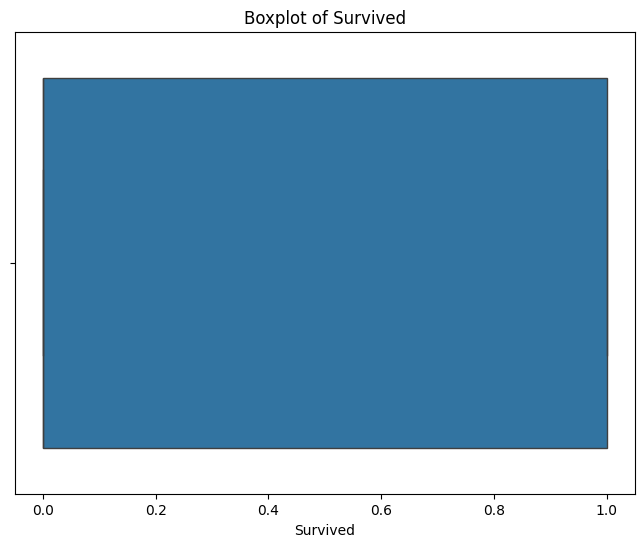

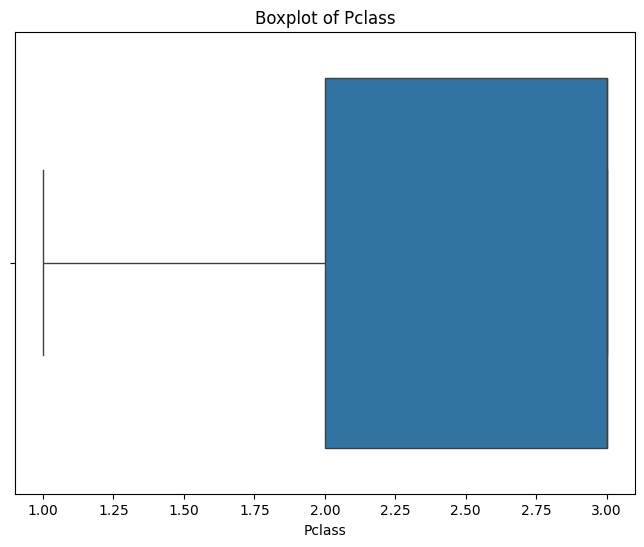

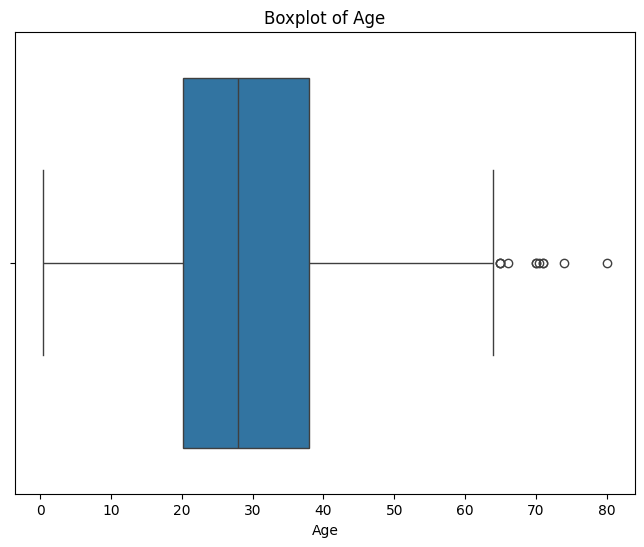

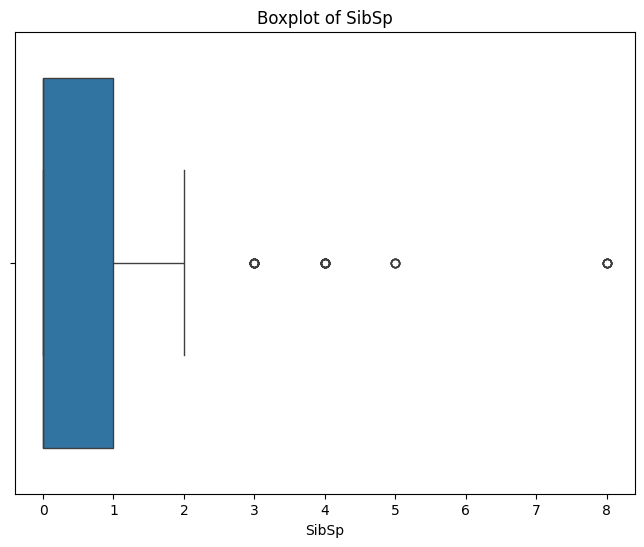

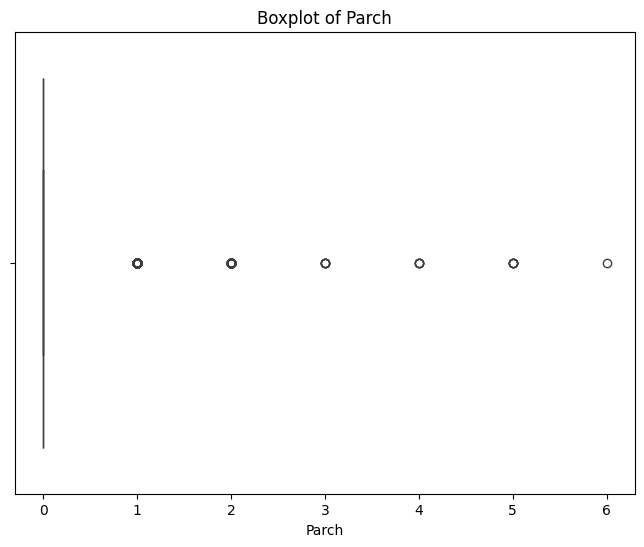

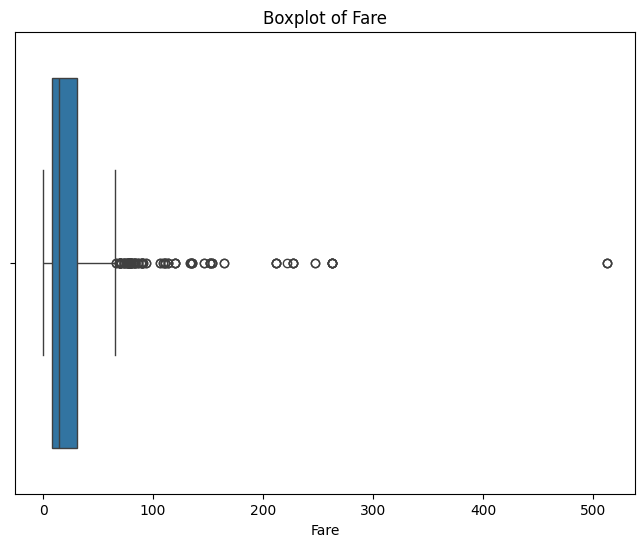

In [ ]:
# Calculate the IQR for numerical features
numerical_features = Train_1.select_dtypes(include=['number'])
Q1 = numerical_features.quantile(0.25)
Q3 = numerical_features.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((numerical_features < lower_bound) | (numerical_features > upper_bound))

# Display outliers
print(outliers)

# You can also visualize outliers using boxplots
import matplotlib.pyplot as plt
import seaborn as sns

for col in numerical_features.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=Train_1[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

# **Data preparation**  

In [ ]:
import pandas as pd

def categorize(value, lower_bound, upper_bound, q1, q3):
    """
    Catégorise une valeur en fonction des seuils définis.

    Arguments :
    - value : float, la valeur à catégoriser.
    - lower_bound : float, limite inférieure.
    - upper_bound : float, limite supérieure.
    - q1 : float, premier quartile.
    - q3 : float, troisième quartile.

    Retourne :
    - str, la catégorie de la valeur.
    """
    if value < lower_bound:
        return 'Très bas'
    elif lower_bound <= value < q1:
        return 'Bas'
    elif q1 <= value <= q3:
        return 'Moyen'
    elif q3 < value <= upper_bound:
        return 'Haut'
    else:
        return 'Très haut'

def transform_quantitative_to_categories(data, columns):
    """
    Transforme des colonnes quantitatives en catégories basées sur l'écart interquartile (IQR).

    Arguments :
    - data : pd.DataFrame, le DataFrame contenant les données.
    - columns : list, les noms des colonnes quantitatives à transformer.

    Retourne :
    - pd.DataFrame, un DataFrame avec les colonnes catégorisées.
    """
    categorized_data = pd.DataFrame()

    for column in columns:
        if column in data.columns:  # Vérifier que la colonne existe
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1

            # Définir les limites pour les classes
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr

            # Appliquer la fonction de catégorisation à la colonne
            categorized_data[column] = data[column].apply(
                lambda value: categorize(value, lower_bound, upper_bound, q1, q3)
            )
        else:
            raise ValueError(f"La colonne '{column}' n'existe pas dans le DataFrame.")

    return categorized_data

def create_dummies(data, columns=None, drop_first=False):
    """
    Transforme les variables qualitatives d'un DataFrame en variables dummy.

    Arguments :
    - data : pd.DataFrame, le DataFrame contenant les données.
    - columns : list ou None, les colonnes à convertir. Si None, toutes les variables qualitatives seront transformées.
    - drop_first : bool, si True, supprime la première catégorie pour éviter le problème de multicolinéarité.

    Retourne :
    - pd.DataFrame, le DataFrame avec les colonnes qualitatives transformées en dummies.
    """
    if columns is None:
        columns = data.select_dtypes(include=['object', 'category']).columns.tolist()

    # Vérification que les colonnes existent dans le DataFrame
    for col in columns:
        if col not in data.columns:
            raise ValueError(f"La colonne '{col}' n'existe pas dans le DataFrame.")

    # Création des variables dummy
    data_with_dummies = pd.get_dummies(data, columns=columns, drop_first=drop_first)

    return data_with_dummies

def transform_all_columns(data):
    """
    Transforme toutes les colonnes d'un DataFrame :
    - Les colonnes quantitatives sont transformées en catégories.
    - Les colonnes qualitatives sont transformées en variables dummy.

    Arguments :
    - Train_1 : pd.DataFrame, le DataFrame contenant les données.

    Retourne :
    - pd.DataFrame, le DataFrame transformé.
    """
    # Liste des colonnes quantitatives et qualitatives
    quantitative_columns = ["Age", "SibSp", "Parch", "Fare"]
    qualitative_columns = ["Survived", "Pclass", "Name", "Sex", "Ticket", "Cabin", "Embarked"]

    # Vérification des colonnes existantes pour éviter les erreurs
    quantitative_columns = [col for col in quantitative_columns if col in data.columns]
    qualitative_columns = [col for col in qualitative_columns if col in data.columns]

    # Transformation des colonnes quantitatives
    transformed_quantitative = transform_quantitative_to_categories(data, quantitative_columns)

    # Transformation des colonnes qualitatives
    transformed_qualitative = create_dummies(data, qualitative_columns, drop_first=False)

    # Combiner les deux transformations
    df_combined = pd.concat([transformed_quantitative, transformed_qualitative], axis=1)

    return df_combined


In [ ]:
Train_1_transformed = transform_all_columns(Train_1)
Train_1_transformed

,Age,SibSp,Parch,Fare,PassengerId,Age,SibSp,Parch,Fare,Survived_0,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,Moyen,Moyen,Moyen,Bas,1,22.0,1,0,7.2500,True,...,False,False,False,False,False,False,False,False,False,True
1,Moyen,Moyen,Moyen,Très haut,2,38.0,1,0,71.2833,False,...,False,False,False,False,False,False,False,True,False,False
2,Moyen,Moyen,Moyen,Moyen,3,26.0,0,0,7.9250,False,...,False,False,False,False,False,False,False,False,False,True
3,Moyen,Moyen,Moyen,Haut,4,35.0,1,0,53.1000,False,...,False,False,False,False,False,False,False,False,False,True
4,Moyen,Moyen,Moyen,Moyen,5,35.0,0,0,8.0500,True,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,Moyen,Moyen,Moyen,Moyen,887,27.0,0,0,13.0000,True,...,False,False,False,False,False,False,False,False,False,True
887,Bas,Moyen,Moyen,Moyen,888,19.0,0,0,30.0000,False,...,False,False,False,False,False,False,False,False,False,True
888,Très haut,Moyen,Très haut,Moyen,889,NaN,1,2,23.4500,True,...,False,False,False,False,False,False,False,False,False,True
889,Moyen,Moyen,Moyen,Moyen,890,26.0,0,0,30.0000,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
transformed.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'PassengerId', 'Age', 'SibSp', 'Parch',
       'Fare', 'Survived_0',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1738)

# **Entraînement du modèle RandomForest**

In [ ]:
import pandas as pd
 from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Fonction 1 : Imputation des valeurs manquantes
def handle_missing_values(data):
    """
    Remplace les valeurs manquantes pour les colonnes spécifiques.

    Arguments:
    - data : pd.DataFrame, le DataFrame contenant les données.

    Retourne:
    - pd.DataFrame, le DataFrame avec les valeurs manquantes traitées.
    """
    data['Age'].fillna(data['Age'].mean(), inplace=True)
    data['Fare'].fillna(data['Fare'].mean(), inplace=True)
    data.dropna(subset=['Embarked'], inplace=True)  # Supprimer les lignes où 'Embarked' est NaN
    return data

# Fonction 2 : Catégorisation des variables quantitatives
def categorize(value, lower_bound, upper_bound, q1, q3):
    """
    Catégorise une valeur en fonction des seuils définis.

    Arguments:
    - value : float, la valeur à catégoriser.
    - lower_bound : float, limite inférieure.
    - upper_bound : float, limite supérieure.
    - q1 : float, premier quartile.
    - q3 : float, troisième quartile.

    Retourne:
    - str, la catégorie de la valeur.
    """
    if value < lower_bound:
        return 'Très bas'
    elif lower_bound <= value < q1:
        return 'Bas'
    elif q1 <= value <= q3:
        return 'Moyen'
    elif q3 < value <= upper_bound:
        return 'Haut'
    else:
        return 'Très haut'

def transform_quantitative_to_categories(data, columns):
    """
    Transforme les colonnes quantitatives en catégories basées sur l'IQR.

    Arguments:
    - data : pd.DataFrame, le DataFrame contenant les données.
    - columns : list, les noms des colonnes quantitatives à transformer.

    Retourne:
    - pd.DataFrame, un DataFrame avec les colonnes catégorisées ajoutées.
    """
    for column in columns:
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        data[f'{column}_cat'] = data[column].apply(
            lambda value: categorize(value, lower_bound, upper_bound, q1, q3)
        )
    return data

# Fonction 3 : Encodage des variables qualitatives
def encode_categorical_variables(data, categorical_columns):
    """
    Transforme les variables qualitatives en variables dummy.

    Arguments:
    - data : pd.DataFrame, le DataFrame contenant les données.
    - categorical_columns : list, les colonnes catégoriques à encoder.

    Retourne:
    - pd.DataFrame, un DataFrame avec les variables qualitatives encodées.
    """
    data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
    return data

# Fonction 4 : Préparation des données
def prepare_data(data):
    """
    Prépare les données pour l'entraînement d'un modèle.

    Arguments:
    - data : pd.DataFrame, le DataFrame brut.

    Retourne:
    - X : pd.DataFrame, les variables explicatives transformées.
    - y : pd.Series, la variable cible.
    """
    # Suppression explicite de la colonne 'PassengerId' et 'Cabin'
    data.drop(columns=['PassengerId', 'Cabin'], inplace=True, errors='ignore')

    # Traitement des valeurs manquantes
    data = handle_missing_values(data)

    # Transformation des colonnes quantitatives en catégories
    quantitative_columns = ['Age', 'SibSp', 'Parch', 'Fare']
    data = transform_quantitative_to_categories(data, quantitative_columns)

    # Encodage des variables qualitatives
    categorical_columns = ['Sex', 'Embarked', 'Age_cat', 'SibSp_cat', 'Parch_cat', 'Fare_cat']
    data = encode_categorical_variables(data, categorical_columns)

    # Séparation des variables explicatives (X) et cible (y)
    X = data.drop(columns=['Survived', 'Name', 'Ticket'])
    y = data['Survived']

    return X, y

# Fonction 5 : Entraînement et évaluation du modèle
def train_random_forest(X, y):
    """
    Entraîne un modèle Random Forest et calcule les scores.

    Arguments:
    - X : pd.DataFrame, les variables explicatives.
    - y : pd.Series, la variable cible.

    Retourne:
    - train_score : float, score d'entraînement.
    - test_score : float, score de test.
    """
    # Division des données en jeu d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Initialisation et entraînement du modèle
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Prédictions
    y_train_pred = rf_model.predict(X_train)
    y_test_pred = rf_model.predict(X_test)

    # Scores
    train_score = accuracy_score(y_train, y_train_pred)
    test_score = accuracy_score(y_test, y_test_pred)

    return train_score, test_score


In [ ]:
X, y = prepare_data(Train_1)

<ipython-input-71-e9e132d67299>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(), inplace=True)
<ipython-input-71-e9e132d67299>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [ ]:
train_score, test_score = train_random_forest(X, y)
print(f"Score d'entraînement : {train_score:.4f}")
print(f"Score de test : {test_score:.4f}")

Score d'entraînement : 0.9839
Score de test : 0.8015


In [ ]:
def creer_modele_adaboost(X_train, y_train, X_test, y_test, n_estimators=50, learning_rate=1.0, base_estimator=None):
    """
    Crée et entraîne un modèle AdaBoost.

    Paramètres :
        - X_train : Données d'entraînement (features)
        - y_train : Labels d'entraînement
        - X_test : Données de test (features)
        - y_test : Labels de test
        - n_estimators : Nombre d'estimateurs faibles (default=50)
        - learning_rate : Taux d'apprentissage (default=1.0)
        - base_estimator : Estimateur de base (default=None, DecisionTreeClassifier utilisé par défaut)

    Retourne :
        - modele : Modèle entraîné
        - accuracy : Précision sur les données de test
    """
    # Si aucun estimateur de base n'est spécifié, utiliser un arbre de décision simple
    if base_estimator is None:
        base_estimator = DecisionTreeClassifier(max_depth=1)

    # Créer le modèle AdaBoost
    modele = AdaBoostClassifier(
        base_estimator=base_estimator,
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )

    # Entraîner le modèle
    modele.fit(X_train, y_train)

    # Prédire sur les données de test
    y_pred = modele.predict(X_test)

    # Calculer la précision
    accuracy = accuracy_score(y_test, y_pred)

    return modele, accuracy